In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load your data
df = pd.read_csv('final_airbnb_dataset.csv')

In [10]:
df['adjusted_reviews'] = df['number_of_reviews_x'].apply(lambda x: np.log1p(x) if x > 0 else -1)

X = df[['distance_score', 'price_score', 'number_of_reviews_x']]
y = df['booked']

# Step 1: Standardize features (very important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
model = MLPClassifier(hidden_layer_sizes=(16, 8),  # You can try (16,) for just one hidden layer
                      activation='relu',           # ReLU is good for non-linear relationships
                      solver='adam',               # Adam optimizer works well for most cases
                      max_iter=500,
                      random_state=42)

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# (Optional) Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6782
           1       1.00      1.00      1.00       775

    accuracy                           1.00      7557
   macro avg       1.00      1.00      1.00      7557
weighted avg       1.00      1.00      1.00      7557


Confusion Matrix:
[[6781    1]
 [   1  774]]


In [12]:
df['predicted_proba'] = model.predict_proba(X_scaled)[:, 1]

# Sort Airbnbs by probability of being booked
top_airbnbs = df.sort_values(by='predicted_proba', ascending=False).head(10)
print("\nTop 10 Recommended Airbnbs:\n", top_airbnbs[['distance_score', 'price_score', 'number_of_reviews_x', 'predicted_proba']])



Top 10 Recommended Airbnbs:
        distance_score  price_score  number_of_reviews_x  predicted_proba
6139         0.864084     0.488312                    0              1.0
9590         0.864084     0.481795                    3              1.0
6368         0.864084     0.625337                  184              1.0
25621        0.864084     0.575809                   98              1.0
32201        0.864084     0.569065                  152              1.0
2128         0.864084     0.481661                    2              1.0
2136         0.864084     0.488312                    0              1.0
36173        0.864084     0.720364                    1              1.0
23889        0.864084     0.503130                    7              1.0
36172        0.864084     0.728614                    0              1.0


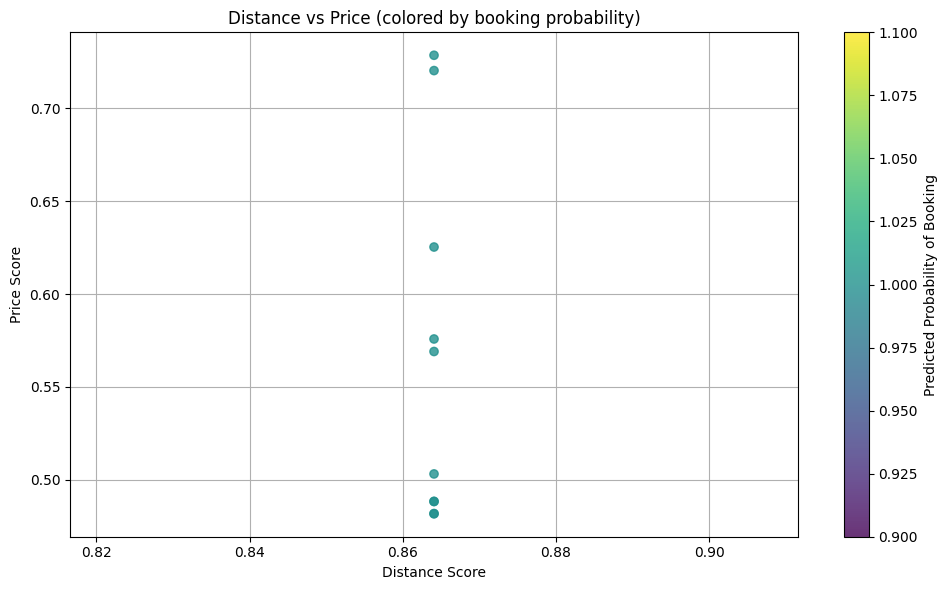

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sc = plt.scatter(top_airbnbs['distance_score'], top_airbnbs['price_score'], c=top_airbnbs['predicted_proba'], cmap='viridis', alpha=0.8)
plt.colorbar(sc, label='Predicted Probability of Booking')
plt.title('Distance vs Price (colored by booking probability)')
plt.xlabel('Distance Score')
plt.ylabel('Price Score')
plt.grid(True)
plt.tight_layout()
plt.show()
